In [1]:
## author: Virginia Ordoño Bernier
## date:January 2024

# Árbol de decisión con clasificación
El objetivo es clasificar la calidad el vino en función de las características.
Se usará __análisis de clasificación__ con el fin de capturar la relación entre las características y el nivel de calidad de los vinos.

### Carga de datos

In [2]:
import pandas as pd

csv = './data/winequality-red.csv'
data = pd.read_csv(csv)
df_wines = pd.DataFrame(data)
print(df_wines.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Análisis exploratorio para visualizar la distribución de las clases

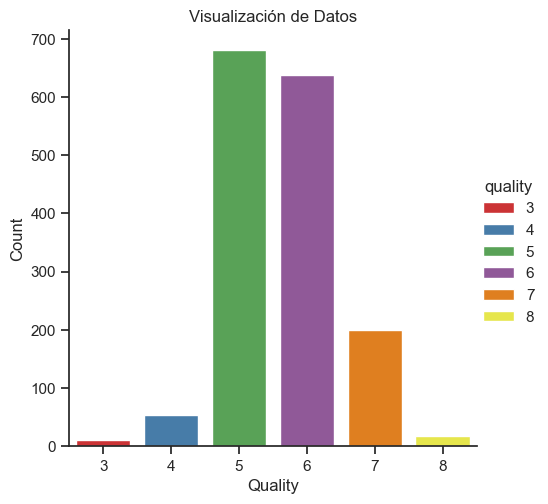

Instancias por clase
quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style='ticks') # line stlye
# kind='count' = amount of ocurrences of each class
sns.catplot(x='quality', data=df_wines, kind='count', hue='quality', palette='Set1')
plt.title("Visualización de Datos")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
print('Instancias por clase')
print(df_wines.groupby('quality').size())

### Preparación de los datos para el entrenamiento

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_wines, test_size=0.2, random_state=42)

# Reset index to maintain an order
train.reset_index(inplace = True)
test.reset_index(inplace = True)

print("Conjunto de entrenamiento:")
print(train.head())

print("\nConjunto de prueba:")
print(test.head())

Conjunto de entrenamiento:
   index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    493            8.7             0.690         0.31             3.0   
1    354            6.1             0.210         0.40             1.4   
2    342           10.9             0.390         0.47             1.8   
3    834            8.8             0.685         0.26             1.6   
4    705            8.4             1.035         0.15             6.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.086                 23.0                  81.0  1.00020  3.48   
1      0.066                 40.5                 165.0  0.99120  3.25   
2      0.118                  6.0                  14.0  0.99820  3.30   
3      0.088                 16.0                  23.0  0.99694  3.32   
4      0.073                 11.0                  54.0  0.99900  3.37   

   sulphates  alcohol  quality  
0       0.74     11.6        6  
1       0.59     

### Selección de la variables más correlacionadas con la variable de salida

In [5]:
# Get correlations
correlation_matrix = df_wines.corr()

# Compare with target and sort them
correlation = correlation_matrix['quality']
sorted_correlations = correlation.sort_values(ascending=False)

print(sorted_correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


### Creación y entrenamiento del modelo con las variables con mayor correlación
Usaremos tanto criterio entropía como índice gini

In [6]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train = train[['alcohol', 'sulphates']]
y_train = train['quality']
X_test = test[['alcohol', 'sulphates']]
y_test = test['quality']

model_entropy = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
model_gini = DecisionTreeClassifier(max_depth = 4, criterion = 'gini')

# Trainig
model_entropy.fit(X_train, y_train)
model_gini.fit(X_train, y_train)

# Prediction
y_pred_entr = model_entropy.predict(X_test)
y_pred_gini = model_gini.predict(X_test)

# Accuracy. Better for classification problems
accuracy = accuracy_score(test['quality'], y_pred_entr)
print(f'Precisión Entropía: {round(accuracy, 2)}')
accuracy = accuracy_score(test['quality'], y_pred_gini)
print(f'Precisión Índice Gini: {round(accuracy, 2)}')

# Classification Report
print("\nInforme de Clasificación Entropía:")
print(classification_report(test['quality'], y_pred_entr))
print("\nInforme de Clasificación Índice de Gini:")
print(classification_report(test['quality'], y_pred_gini))


Precisión Entropía: 0.57
Precisión Índice Gini: 0.57

Informe de Clasificación Entropía:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.76      0.69       130
           6       0.53      0.55      0.54       132
           7       0.40      0.24      0.30        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.26      0.26      0.26       320
weighted avg       0.53      0.57      0.54       320


Informe de Clasificación Índice de Gini:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.62      0.79      0.69       130
           6       0.53      0.52      0.52       132
           7       0.42      0.24      0.30        42
 

c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Visualizacion del árbol de decisión

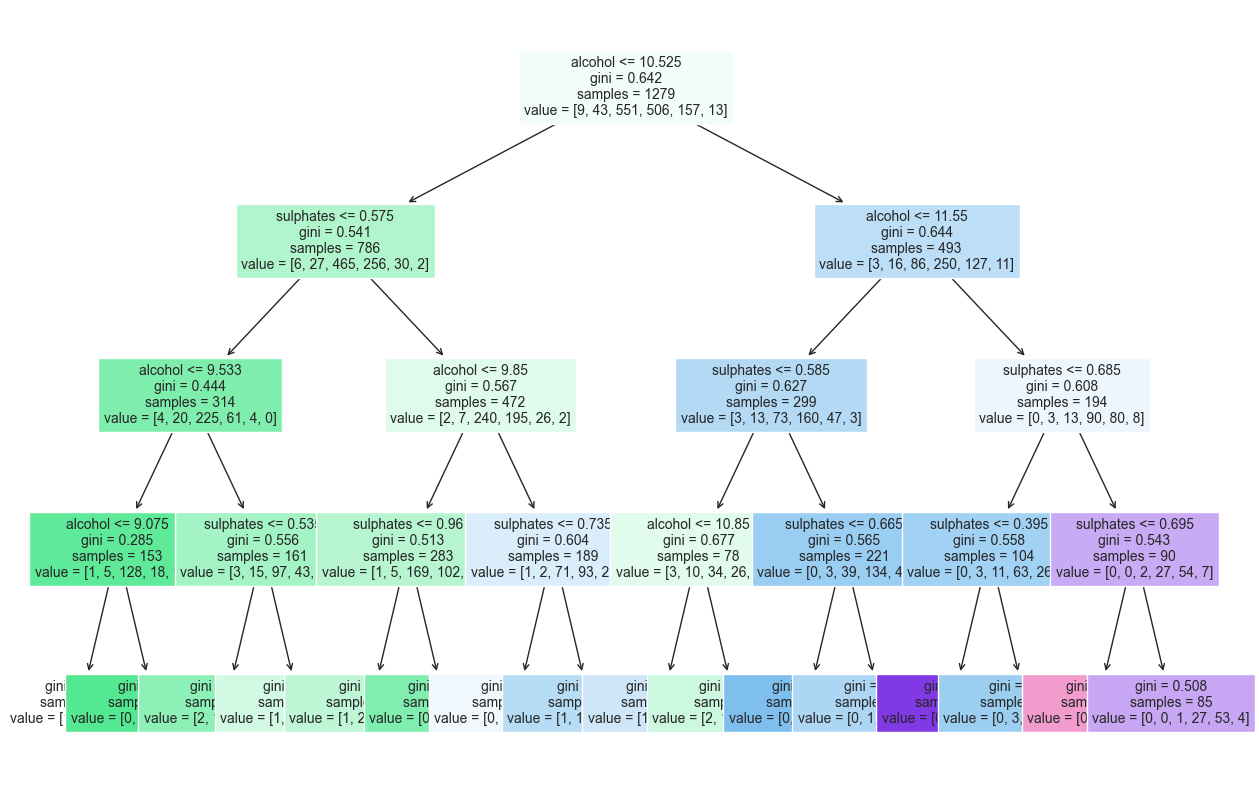

In [7]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model_gini, feature_names=['alcohol', 'sulphates'], filled=True, fontsize=10)
plt.show()

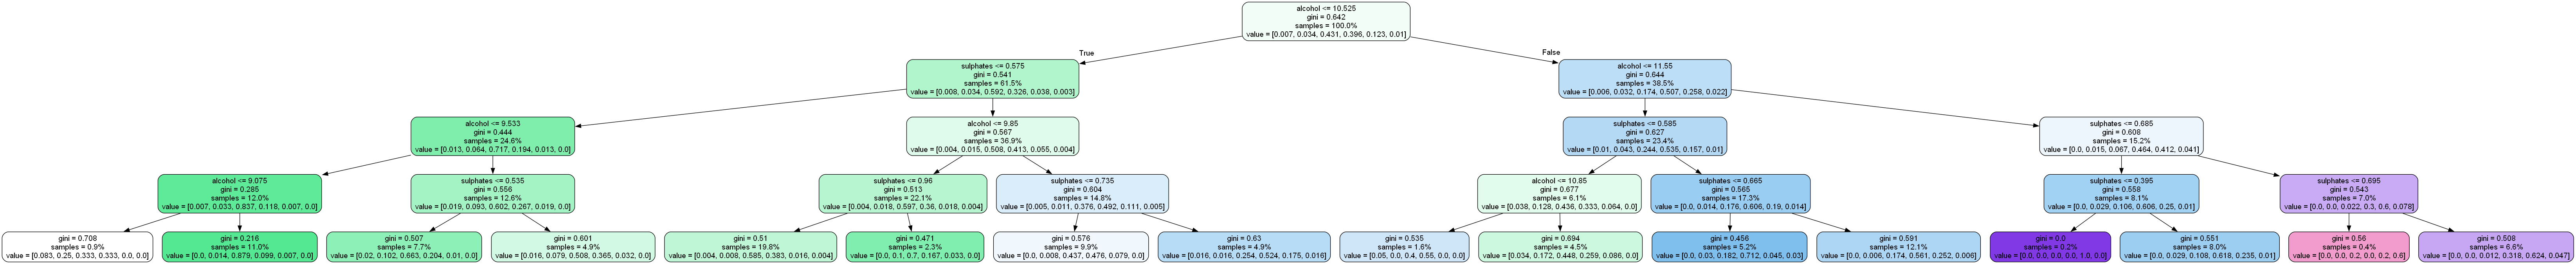

In [8]:
import pydot
from IPython.display import Image

from io import StringIO

from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(model_gini, out_file = dot_data, proportion = True, feature_names = ["alcohol", "sulphates"], rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### Importancia de las variables
La importancia de las variables se deriva del propio modelo, y se calcula observando cómo cada característica contribuye a reducir la impureza (o aumentar la pureza) de los nodos en el árbol de decisión durante el proceso de entrenamiento.

In [9]:
X_train = train.drop('quality', axis=1)
y_train = train['quality']

# Gini criterio by default
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Get importance
importances = classifier.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Exclude column 'index' if exists
if 'index' in feature_importance_df['Feature'].values:
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'index']

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Informe de Importancia de las Variables:")
print(feature_importance_df)



Informe de Importancia de las Variables:
                 Feature  Importance
11               alcohol    0.177754
10             sulphates    0.106803
7   total sulfur dioxide    0.091896
8                density    0.086561
2       volatile acidity    0.085479
5              chlorides    0.080326
9                     pH    0.077474
4         residual sugar    0.063273
3            citric acid    0.060426
6    free sulfur dioxide    0.046676
1          fixed acidity    0.045905


### Validación cruzada
 El objetivo es encontrar la mejor profundidad (best_depth) para un modelo de árbol de decisión utilizando la validación cruzada en series temporales y minimizando el Error Absoluto Medio (MAE). 

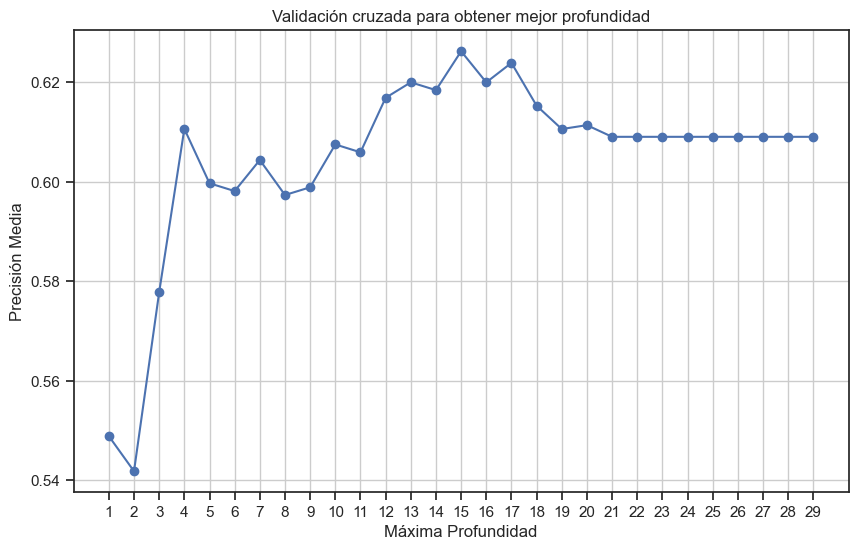

Mejor profundidad: 15
Mayor Precisión Media: 0.6262539184952978


In [10]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Supongamos que ya has dividido tus datos en train y test

cv = KFold(n_splits=4)

total_scores = []
best_depth = None
max_accuracy = 0.0

for i in range(1, 30):
    fold_accuracies = []
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)

    # Divide train and test groups
    for train_fold, test_fold in cv.split(train):
        f_train = train.iloc[train_fold] # train_fold index, selects a row. F_train is a new df 
        f_test = train.iloc[test_fold] # test_fold index, selects a row. F_test is a new df

        dt.fit(
            X=f_train.drop(['quality'], axis=1),  # thorugh the column
            y=f_train['quality']
        )
        X_test = f_test.drop(['quality'], axis=1)  # thorugh the column
        y_pred = dt.predict(X_test)

        # Evaluation
        accuracy = accuracy_score(f_test['quality'], y_pred)
        fold_accuracies.append(accuracy)
    
    # Calculate and store the average accuracy for the current depth
    avg_accuracy = np.mean(fold_accuracies)
    total_scores.append(avg_accuracy)
    
    # Check if the current depth results in a bigger accuracy
    if avg_accuracy > max_accuracy:
        max_accuracy = avg_accuracy
        best_depth = i

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), total_scores, marker='o', linestyle='-', color='b')
plt.title('Validación cruzada para obtener mejor profundidad')
plt.xlabel('Máxima Profundidad')
plt.ylabel('Precisión Media')
plt.xticks(range(1, 30))
plt.grid(True)
plt.show()

# Print the results
print(f"Mejor profundidad: {best_depth}")
print(f"Mayor Precisión Media: {max_accuracy}")


### Ejecutar el modelo con el mejor parámetro, obtenido de la validación cruzada: la profundidad que da menor error

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selecting classifier. Mean Squared Error by default
classifier = DecisionTreeClassifier(max_depth = 15)

# Training with all the group
classifier.fit(X=train.drop(['quality'], axis=1), y=train['quality'])

# Prediction 
y_pred = classifier.predict(X=test.drop(['quality'], axis=1))

# Accuracy. Better for classification problems
accuracy = accuracy_score(test['quality'], y_pred)
print(f'Precisión: {round(accuracy, 2)}')

# Classification Report
print("Informe de Clasificación:")
print(classification_report(test['quality'], y_pred))


Precisión: 0.57
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.58      0.57      0.57       132
           7       0.50      0.48      0.49        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.28      0.29      0.29       320
weighted avg       0.56      0.57      0.57       320



### Importancia de las variables
La importancia de las variables se deriva del propio modelo, y se calcula observando cómo cada característica contribuye a reducir la impureza (o aumentar la pureza) de los nodos en el árbol de decisión durante el proceso de entrenamiento.

In [12]:
# Gini criterio by default
classifier = tree.DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Get importance
importances = classifier.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Exclude column 'index' if exists
if 'index' in feature_importance_df['Feature'].values:
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'index']

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Informe de Importancia de las Variables:")
print(feature_importance_df)


Informe de Importancia de las Variables:
                 Feature  Importance
11               alcohol    0.177754
10             sulphates    0.106803
7   total sulfur dioxide    0.091896
8                density    0.086561
2       volatile acidity    0.085479
5              chlorides    0.080326
9                     pH    0.077474
4         residual sugar    0.063273
3            citric acid    0.060426
6    free sulfur dioxide    0.046676
1          fixed acidity    0.045905
